In [19]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import astropy
from astropy import units as u
import astromet
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
dr2period=22/12 # in years
edr3Period=34/12 # in years
mas=astromet.mas # conversion from degrees to milli-arcseconds

In [61]:
# times when system is observed [years] relative to start of Gaia's observations (2456863.94 BJD)
ts=np.sort(edr3Period*np.random.rand(128))

# an object wich holds all the necessary parameters to find the astrometric path
params=astromet.params()

# For this example we'll generate a random binary system

# center of mass parameters
params.RA=360*np.random.rand()
params.Dec=90*(-1+2*np.random.rand())
print('RA and Dec [degrees]:',params.RA,params.Dec)
params.pmRA=10*np.random.randn()
params.pmDec=10*np.random.randn()
print('Proper motion in RA and Dec [mas/yr]: ',params.pmRA,params.pmDec)
params.pllx=10*np.random.rand()
print('Parallax [mas]: ',params.pllx)

# binary parameters
params.M=10*np.random.rand()
print('Mass of brightest source [mSun]: ',params.M)
params.a=5*np.random.rand()
print('Semi-major axis [AU]: ',params.a)
params.e=np.random.rand()
print('Eccentricity [dimensionless]: ',params.e)
params.q=10*(np.random.rand()**4)
params.l=np.random.rand()
print('Light (l<1) and mass (q) ratios of binary [dimensionless]: ',params.l,params.q)
params.vPhi=2*np.pi*np.random.rand()
params.vTheta=np.pi*np.random.rand()
print('On-sky projection angles (vPhi and vTheta) of binary [radians]',params.vPhi,params.vTheta)
params.vOmega=2*np.pi*np.random.rand()
print('On-sky orientation angle of binary [radians]',params.vOmega)
params.tPeri=astromet.period(params)*np.random.rand()
print('Time of first binary periapse [years]: ',params.tPeri)



# on sky paths [degrees]
ras,decs=astromet.path(ts,params)

RA and Dec [degrees]: 33.694625484831484 23.632044744400847
Proper motion in RA and Dec [mas/yr]:  7.59290012024251 8.28154452428643
Parallax [mas]:  9.024455192753711
Mass of brightest source [mSun]:  8.294032710690946
Semi-major axis [AU]:  3.858301670289107
Eccentricity [dimensionless]:  0.20275014534341418
Light (l<1) and mass (q) ratios of binary [dimensionless]:  0.06972222973145492 0.17561197911628046
On-sky projection angles (vPhi and vTheta) of binary [radians] 3.449217702315455 2.34226557399318
On-sky orientation angle of binary [radians] 5.6207851658239925
Time of first binary periapse [years]:  0.2676250488869035


In [62]:
# fitting for offset from first obs (delta RA_0 & delta Dec_0), proper motion and parralax
fitParams,fitCovariance=astromet.fit(ts,ras,decs)
print('original parameters [mas]: \t',0,0,params.pmRA,params.pmDec,params.pllx)
print('derived parameters [mas]: \t',fitParams)
print('derived parameter error [mas]: \t',np.sqrt(np.diagonal(fitCovariance)))
# note that parameters may not agree within error bars due to binary contribution

print('\ncovariance matrix [mas**2]: \n',fitCovariance)

medRa:  33.694625485502925
original parameters [mas]: 	 0 0 7.59290012024251 8.28154452428643 9.024455192753711
derived parameters [mas]: 	 [ 0.53599289 -3.88649757  6.79131511  9.1311438   8.7319543 ]
derived parameter error [mas]: 	 [0.19064531 0.16945971 0.10726813 0.10599915 0.11245549]

covariance matrix [mas**2]: 
 [[ 0.03634563  0.00218512 -0.01344247  0.0006649   0.01018984]
 [ 0.00218512  0.02871659  0.00043439 -0.01489774  0.00271187]
 [-0.01344247  0.00043439  0.01150645  0.00013218  0.00202569]
 [ 0.0006649  -0.01489774  0.00013218  0.01123582  0.00082518]
 [ 0.01018984  0.00271187  0.00202569  0.00082518  0.01264624]]


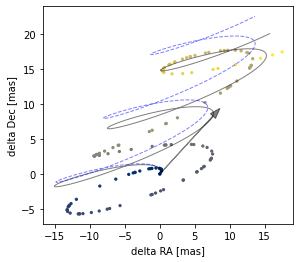

In [63]:
# plotting on sky motion
qPl=plt.gca() # defining matplotlib axis object on which to plot

deltaRas=(ras-ras[0])/mas # posn relative to first observation in mas
deltaDecs=(decs-decs[0])/mas
cs=mpl.cm.cividis(ts/ts[-1]) # optional, but I like to color by time
qPl.scatter(deltaRas,deltaDecs,s=5,c=cs)

# optional - adding the centre of mass motion (grey) for reference
tUniform=np.linspace(ts[0],ts[-1],1000)
comRas,comDecs=astromet.comPath(tUniform,params)
deltaComRas=(comRas-comRas[0])/mas
deltaComDecs=(comDecs-comDecs[0])/mas
qPl.plot(deltaComRas,deltaComDecs,lw=1,c='k',alpha=0.5)

# optional - adding best fit motion (blue) for reference
bestParams=astromet.params()
bestParams.RA=ras[0]+mas*fitParams[0]
bestParams.Dec=decs[0]+mas*fitParams[1]
bestParams.pmRA=fitParams[2]
bestParams.pmDec=fitParams[3]
bestParams.pllx=fitParams[4]
bestRas,bestDecs=astromet.comPath(tUniform,bestParams)
deltaBestRas=(bestRas-bestRas[0])/mas
deltaBestDecs=(bestDecs-bestDecs[0])/mas
qPl.plot(deltaBestRas,deltaBestDecs,lw=1,c='b',alpha=0.5,ls='--')

# adding initial position and proper motion as arrow
qPl.arrow(0,0,params.pmRA,params.pmDec,head_width=1,color='k',alpha=0.5)

qPl.set_xlabel('delta RA [mas]')
qPl.set_ylabel('delta Dec [mas]')
qPl.set_aspect('equal')

plt.show()